# DECISION TREES and RANDOM FORESTS (with KYPHOSIS DATASET)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("kyphosis.csv")

In [3]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


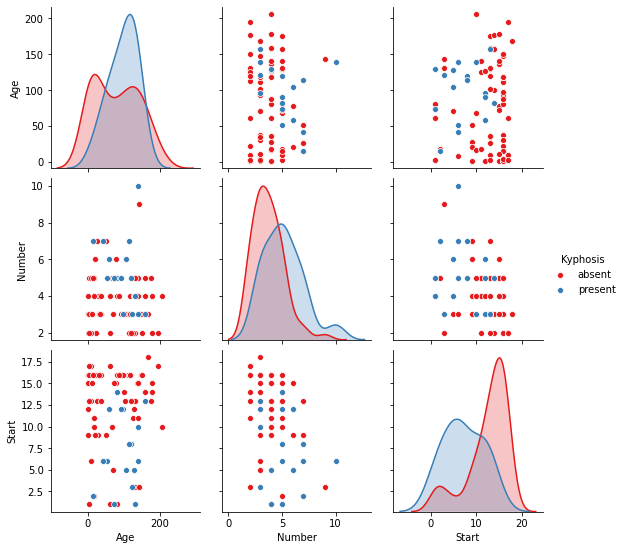

In [5]:
sns.pairplot(df, hue="Kyphosis", palette ="Set1")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop("Kyphosis", axis=1)

In [8]:
y = df["Kyphosis"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## DECISION TREES

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## PREDICTION and EVALUATION

In [17]:
y_pred = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
print(cnf_matrix)

[[16  2]
 [ 4  3]]


Text(0.5, 15.0, 'Predicted Label')

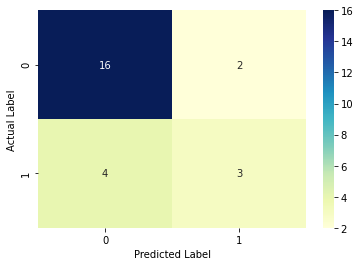

In [21]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.89      0.84        18
     present       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



In [23]:
from sklearn import tree

In [24]:
features = list(df.columns[1:])
targets = ["absent", "present"]

print(features)
print(targets)

['Age', 'Number', 'Start']
['absent', 'present']


In [25]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

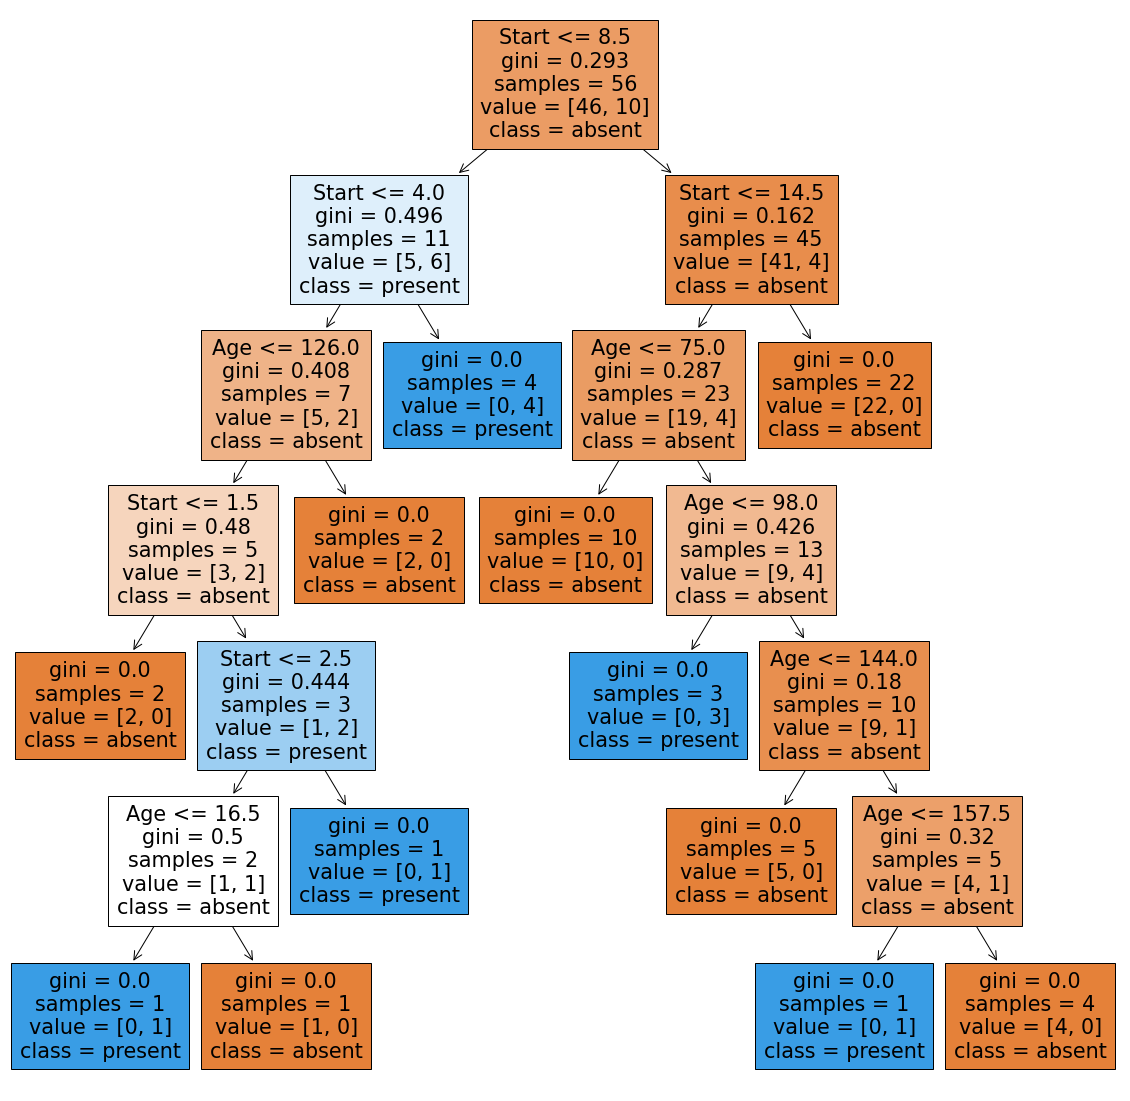

In [26]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dtree,filled=True,feature_names=features ,class_names = targets)

## RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(n_estimators = 100)

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [52]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [53]:
cnf_matrix

array([[17,  1],
       [ 5,  2]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

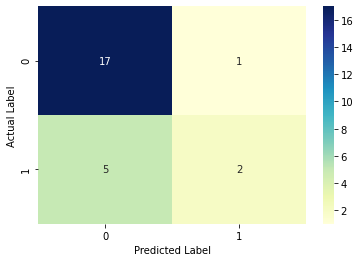

In [54]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25



In [56]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf.png')